In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from linear_regression import LinearRegression, mean_square_loss, optimal_weight_vector

## Read In Data

In [3]:
# read in data
cols=['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr', 'Fine Aggr', 'Slump']
df_train = pd.read_csv('../data/concrete/train.csv', names=cols)
df_test = pd.read_csv('../data/concrete/test.csv', names=cols)

X = df_train.drop('Slump', axis=1).values
y = df_train['Slump'].values

X_test = df_test.drop('Slump', axis=1).values
y_test = df_test['Slump'].values

In [4]:
# get optimal weight vector
optimal_weight = optimal_weight_vector(X, y)

## Train Models
### Batch

In [5]:
# fit data with batch method
lr = 1e-2
model_batch = LinearRegression(tol=1e-6)
model_batch.fit(X, y, r=lr, method='batch')

print('BATCH GRADIENT DESCENT')
print(f"Learning Rate: {lr}\n")
print(f'Weights: {model_batch.W}\n')
print(f"Training cost: {model_batch.loss[-1]}")
print(f"Test cost:     {mean_square_loss(y_test, model_batch.predict(X_test))}\n")

BATCH GRADIENT DESCENT
Learning Rate: 0.01

Weights: [-0.01520362  0.90022499  0.78594341  0.85066508  1.29862298  0.12983393
  1.5717928   0.99834709]

Training cost: 14.981943701311598
Test cost:     23.361305269196603



### SGD

In [6]:
# fit data with sgd method

lr = 2e-3
model_sgd = LinearRegression(tol=1e-6)
# model_sgd.fit(X, y, r=5e-3, method='sgd', max_iter=1e10)
model_sgd.fit(X, y, r=lr, method='sgd', max_iter=1e10)

print('STOCHASTIC GRADIENT DESCENT')
print(f"Learning Rate: {lr}\n")
print(f'Weights: {model_sgd.W}\n')
print(f"Training cost: {model_sgd.loss[-1]}")
print(f"Test cost:     {mean_square_loss(y_test, model_sgd.predict(X_test))}")

STOCHASTIC GRADIENT DESCENT
Learning Rate: 0.002

Weights: [-0.06488089 -0.06225284 -0.19013859 -0.27689626  0.56247586 -0.0262604
  0.29512954 -0.00181204]

Training cost: 15.506384867960028
Test cost:     24.111512847302556


## Visualize Results

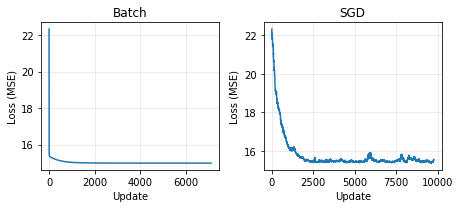

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6.5, 3))

ax[0].plot(model_batch.loss)
ax[1].plot(model_sgd.loss)

for i, title in enumerate(['Batch', 'SGD']):
    ax[i].set_title(title)
    ax[i].set_xlabel('Update')
    ax[i].set_ylabel('Loss (MSE)')
    ax[i].grid(alpha=0.3)

fig.tight_layout()

In [8]:
# check iterations to convergence
print(f"Batch converged after: {len(model_batch.loss)} iterations")
print(f"SGD converged after:   {len(model_sgd.loss)} iterations")

Batch converged after: 7095 iterations
SGD converged after:   9767 iterations


## Comparison With Optimal

In [9]:
print('Weight vector difference with optimal weight vector')
print(f"Batch: {np.linalg.norm((optimal_weight - model_batch.W))}")
print(f"SGD:   {np.linalg.norm((optimal_weight - model_sgd.W))}")

Weight vector difference with optimal weight vector
Batch: 0.0008862770719391832
SGD:   2.5206928930240866
